In [86]:
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import copy

In [2]:
df_eda = pd.read_csv('data/eda_1583780945.csv')
df_zep = pd.read_csv('data/zephyr_1583780945.csv')

In [4]:
df_eda.columns.values

array(['unix_timestamp', 'Packet Type', 'Timestamp', 'GSR', 'PPG'],
      dtype=object)

In [5]:
df_zep.columns.values

array(['corrected_timestamp', 'samplerate', 'samples', 'sequence_number',
       'timestamp', 'type'], dtype=object)

In [32]:
print(df_eda['unix_timestamp'][300])
print(df_eda['unix_timestamp'][:1])
print(df_eda['unix_timestamp'][-1:])

1583780964.248084
0    1.583781e+09
Name: unix_timestamp, dtype: float64
34547    1.583783e+09
Name: unix_timestamp, dtype: float64


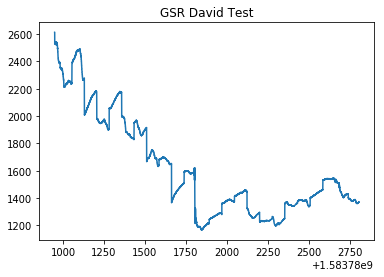

In [43]:
plt.plot(df_eda['unix_timestamp'][3:], df_eda['GSR'][3:])
plt.title('GSR David Test')
plt.show()

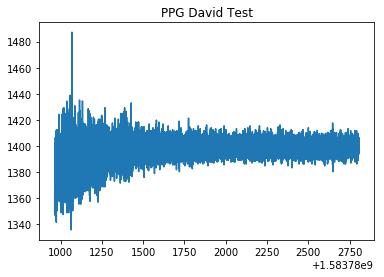

In [27]:
plt.plot(df_eda['unix_timestamp'][300:], df_eda['PPG'][300:])
plt.title('PPG David Test')
plt.show()

['ecg' 'activity' 'heart_rate' 'respiration_rate' 'acceleration'
 'breathing' 'rr' 'heartbeat_interval']


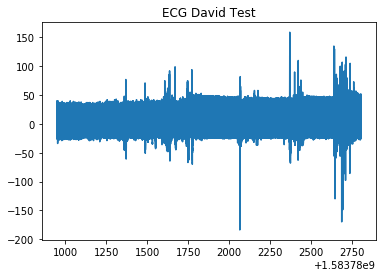

In [95]:
print(df_zep['type'].unique())

def get_data(target_type='ecg'):
    assert(target_type in ['ecg','activity','heart_rate','respiration_rate','acceleration','breathing','rr','heartbeat_interval'])
    
    times, samples = [], []
    for row in df_zep.itertuples():
        if row.type == target_type:
            
            new_samples = ast.literal_eval(row.samples)
                
            if target_type == 'acceleration':
            
                new_times = (1. / row.samplerate) * np.arange(len(new_samples[0]))
                new_times += row.corrected_timestamp

                times.extend(new_times)
                try:
                    samples[0].extend(new_samples[0])
                    samples[1].extend(new_samples[1])
                    samples[2].extend(new_samples[2])
                except Exception as e:
                    samples = copy.copy(new_samples)
            else:
                #new_samples = [int(n) for n in row.samples.strip('][').split(', ')]
            
                new_times = (1. / row.samplerate) * np.arange(len(new_samples))
                new_times += row.corrected_timestamp

                times.extend(new_times)
                samples.extend(new_samples)
        
    return times, samples

times, samples = get_data('ecg')

plt.plot(times, samples)
plt.title('ECG David Test')
plt.show()

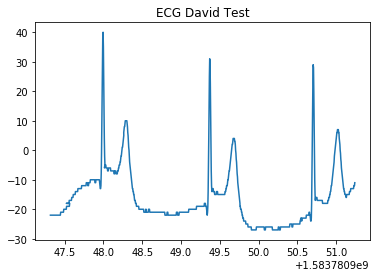

In [69]:
n_samp = 1000
plt.plot(times[:n_samp], samples[:n_samp])
plt.title('ECG David Test')
plt.show()

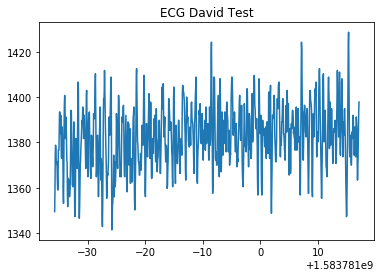

In [58]:
n_samp = 1000
plt.plot(df_eda['unix_timestamp'][300:300+n_samp], df_eda['PPG'][300:300+n_samp])
plt.title('ECG David Test')
plt.show()

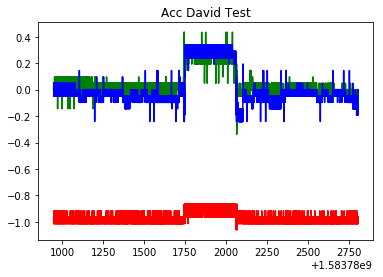

In [99]:
times, samples = get_data('acceleration')

plt.plot(times, samples[0],'r')
plt.plot(times, samples[1],'g')
plt.plot(times, samples[2],'b')

plt.title('Acc David Test')
plt.show()

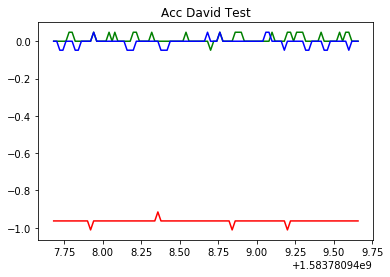

In [103]:
times, samples = get_data('acceleration')

n_samp=100
plt.plot(times[:n_samp], samples[0][:n_samp],'r')
plt.plot(times[:n_samp], samples[1][:n_samp],'g')
plt.plot(times[:n_samp], samples[2][:n_samp],'b')

plt.title('Acc David Test')
plt.show()

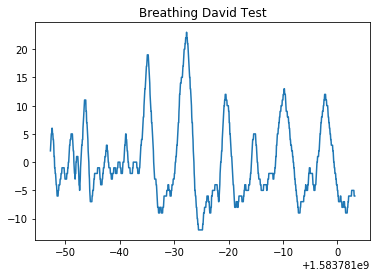

In [102]:
times, samples = get_data('breathing')

n_samp = 1000
plt.plot(times[:n_samp], samples[:n_samp])
plt.title('Breathing David Test')
plt.show()